In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inventory-analysis-case-study/InvoicePurchases12312016.csv
/kaggle/input/inventory-analysis-case-study/EndInvFINAL12312016.csv
/kaggle/input/inventory-analysis-case-study/SalesFINAL12312016.csv
/kaggle/input/inventory-analysis-case-study/BegInvFINAL12312016.csv
/kaggle/input/inventory-analysis-case-study/2017PurchasePricesDec.csv
/kaggle/input/inventory-analysis-case-study/PurchasesFINAL12312016.csv


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Invoice=pd.read_csv("/kaggle/input/inventory-analysis-case-study/InvoicePurchases12312016.csv")
End_Final=pd.read_csv("/kaggle/input/inventory-analysis-case-study/EndInvFINAL12312016.csv")
Sales_final=pd.read_csv("/kaggle/input/inventory-analysis-case-study/SalesFINAL12312016.csv")
begInv=pd.read_csv("/kaggle/input/inventory-analysis-case-study/BegInvFINAL12312016.csv")
purchase=pd.read_csv("/kaggle/input/inventory-analysis-case-study/2017PurchasePricesDec.csv")
purchase_final=pd.read_csv("/kaggle/input/inventory-analysis-case-study/PurchasesFINAL12312016.csv")

**Data Cleaning And Data Overview**

In [6]:
Invoice.head(3)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN


In [7]:
Invoice.tail()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
5538,9622,WEIN BAUER INC,2017-01-06,13626,2016-12-21,2017-02-10,90,1563.00,8.60,NaN
5539,9625,WESTERN SPIRITS BEVERAGE CO,2017-01-10,13661,2016-12-23,2017-02-18,4617,37300.48,186.50,NaN
5540,3664,WILLIAM GRANT & SONS INC,2017-01-02,13643,2016-12-22,2017-02-04,9848,202815.78,932.95,NaN
5541,9815,WINE GROUP INC,2017-01-03,13602,2016-12-20,2017-02-08,24747,149007.56,819.54,NaN
5542,90058,ZORVINO VINEYARDS,2017-01-05,13574,2016-12-18,2017-02-12,437,3608.11,16.60,NaN


In [8]:
Invoice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      374 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [9]:
Invoice.isnull().sum()

VendorNumber       0
VendorName         0
InvoiceDate        0
PONumber           0
PODate             0
PayDate            0
Quantity           0
Dollars            0
Freight            0
Approval        5169
dtype: int64

In [10]:
Invoice.describe()

,VendorNumber,PONumber,Quantity,Dollars,Freight
count,5543.00000,5543.000000,5543.000000,5.543000e+03,5543.000000
mean,20662.75212,10889.419087,6058.880931,5.807338e+04,295.954301
std,34582.15841,1600.859969,14453.338164,1.402340e+05,713.585093
min,2.00000,8106.000000,1.000000,4.140000e+00,0.020000
25%,3089.00000,9503.500000,83.000000,9.678100e+02,5.020000
50%,7240.00000,10890.000000,423.000000,4.765450e+03,24.730000
75%,10754.00000,12275.500000,5100.500000,4.458718e+04,229.660000
max,201359.00000,13661.000000,141660.000000,1.660436e+06,8468.220000


**Changing Data Type of PayDate to datetime**

In [11]:
Invoice['PayDate']=pd.to_datetime(Invoice['PayDate'], errors='coerce')

**Missing Values Percantage**

In [12]:
missing_values=Invoice['Approval'].isnull().sum()
total_values=Invoice['Dollars'].count()
percentage_missing = (missing_values / (total_values + missing_values)) * 100
print('The Total Missing Values In Terms Of Percentage is',round(percentage_missing,2),'%')

The Total Missing Values In Terms Of Percentage is 48.25 %


In [13]:
gd=Invoice.groupby(Invoice['PayDate'].dt.strftime('%b')).agg({'Quantity':'max',
                                'Dollars':'max'}).reset_index()

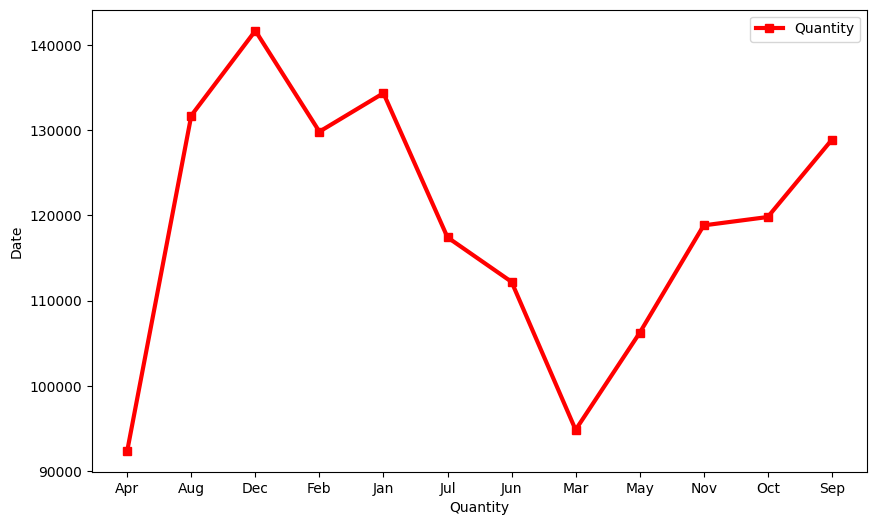

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(gd['PayDate'],gd['Quantity'],color='red',linewidth=3,linestyle='solid',marker='s',label='Quantity')
plt.xlabel("Quantity")
plt.ylabel('Date')
plt.legend()

**Vendor Name Who order in range of massive quantity and dollars**

In [15]:
df1=Invoice[['VendorName','Quantity','Dollars']].sort_values(by='Quantity',ascending=False)

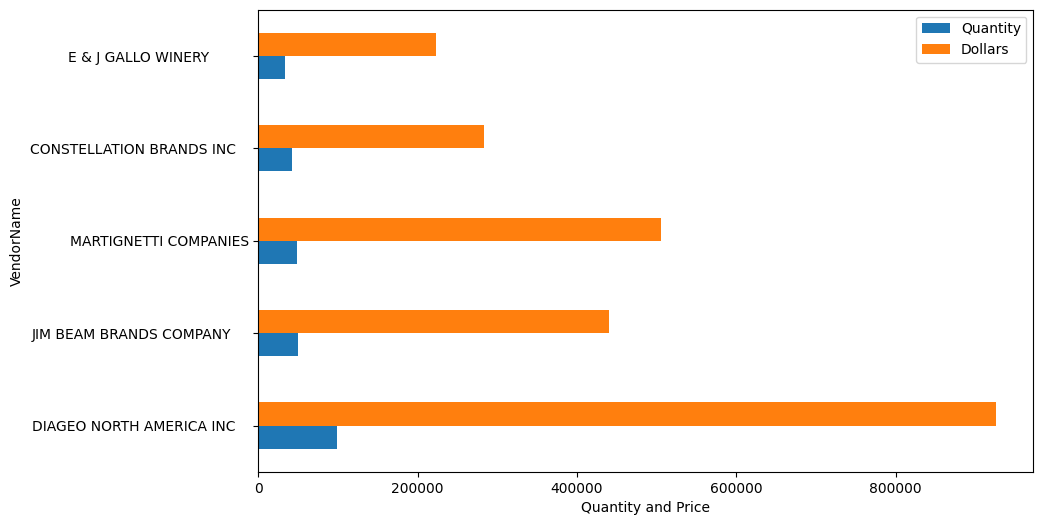

In [16]:
df1.groupby('VendorName').agg({'Quantity':'mean',
                               'Dollars':'mean'}).sort_values(by='Quantity',ascending=False).head(5).plot(kind='barh',figsize=(10, 6))
plt.xlabel('Quantity and Price');

**Bottom 5 date where  price are down**

Text(0.5, 1.0, 'Lessar Price On Date')

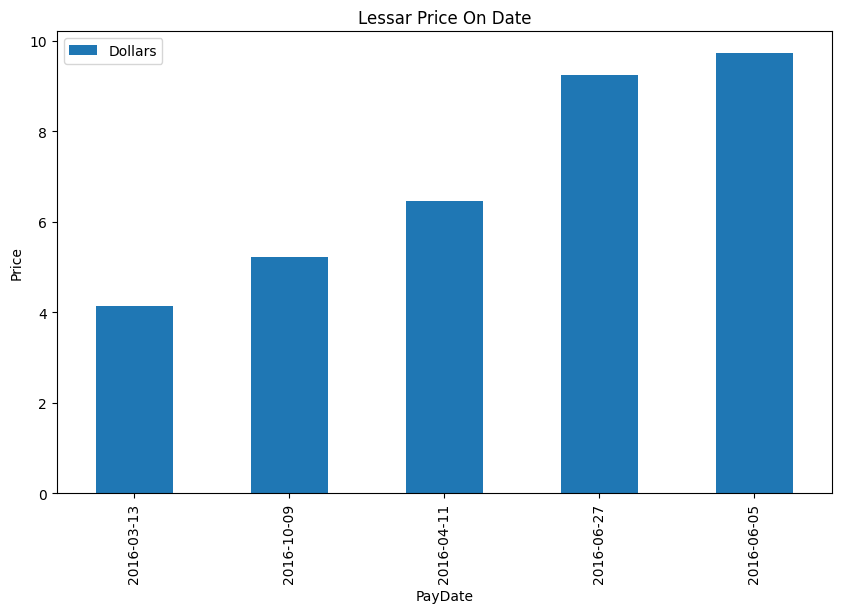

In [17]:
Invoice.groupby(Invoice['PayDate'].dt.date).agg({'Dollars':'min'}).sort_values(by='Dollars',ascending=True).head(5).plot(kind='bar',figsize=(10, 6))
plt.ylabel('Price')
plt.title('Lessar Price On Date')

In [18]:
End_Final.head(3)

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31


In [19]:
End_Final.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2016-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2016-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2016-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2016-12-31
224488,81_PEMBROKE_90604,81,PEMBROKE,90604,Ch Lynch Bages Pauilac,750mL,2,119.99,2016-12-31


In [20]:
End_Final.describe()

,Store,Brand,onHand,Price
count,224489.000000,224489.000000,224489.000000,224489.000000
mean,43.505740,14356.370513,21.763988,23.585583
std,23.326415,13118.467851,37.233576,79.202775
min,1.000000,58.000000,0.000000,0.490000
25%,23.000000,3798.000000,7.000000,9.990000
50%,44.000000,8259.000000,12.000000,14.990000
75%,66.000000,23965.000000,22.000000,23.490000
max,81.000000,90631.000000,3676.000000,13999.900000


In [21]:
End_Final.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [22]:
missing_values=End_Final['City'].isnull().sum()
total_values=End_Final['Price'].count()
percentage_missing = (missing_values / (total_values + missing_values)) * 100
print('The Total Missing Values In Terms Of Percentage is',round(percentage_missing,2),'%')

The Total Missing Values In Terms Of Percentage is 0.57 %


In [23]:
new_val=End_Final.groupby('City').agg({'Brand':'max',
                              'Store':'max'}).sort_values(by='Store',ascending=False).head(10).reset_index()

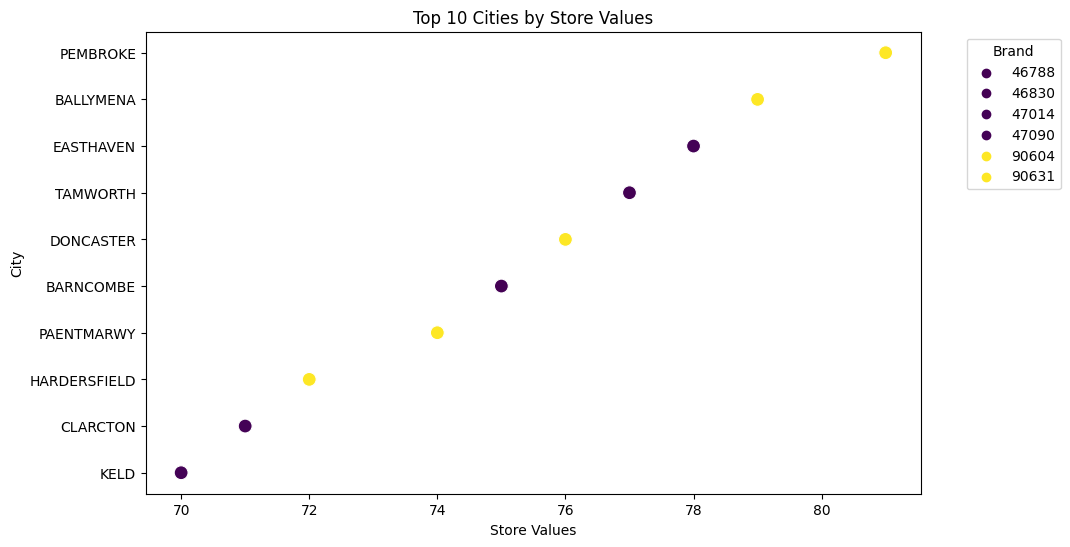

In [24]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Store', y='City', hue='Brand', data=new_val, palette='viridis', s=100)

plt.title('Top 10 Cities by Store Values')
plt.xlabel('Store Values')
plt.ylabel('City')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**Finding Details About Most Expensive Product**

In [25]:
End_Final[End_Final['Price']==End_Final['Price'].max()]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
80372,34_PITMERDEN_2693,34,PITMERDEN,2693,Glen Grant 50 Yr Scotch,750mL,1,13999.9,2016-12-31


**Finding Details about most cheap Product In Dataset**

In [26]:
End_Final[End_Final['Price']==End_Final['Price'].min()]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
213323,77_TAMWORTH_3265,77,TAMWORTH,3265,Firefly Sweet Tea Vodka,50mL,2,0.49,2016-12-31


**No of product lies  Between Price 1 and 10**

In [27]:
price=End_Final[(End_Final['Price']>=1)&(End_Final['Price']<=10)].shape[0]
print('No Of Products Lies Between price 1$ to 10$ are',price)

No Of Products Lies Between price 1$ to 10$ are 58229


In [28]:
mean_price=End_Final[End_Final['Price']>End_Final['Price'].mean()].shape[0]
print('No Of Products Greater Than mean price are',mean_price)

No Of Products Greater Than mean price are 56107


In [29]:
Sales_final.head(3)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [30]:
begInv.head(3)


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01


In [31]:
begInv.tail()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01
206528,79_BALLYMENA_90089,79,BALLYMENA,90089,Ch Lynch Bages 12 Pauillac,750mL,24,119.99,2016-01-01


In [32]:
begInv.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [33]:
begInv.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


**Cheap Product In Dataset**

In [34]:
begInv[begInv['Price']==begInv['Price'].min()]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
36829,15_WANBORNE_19138,15,WANBORNE,19138,Gerard Bertrand Organic Rose,750mL,0,0.0,2016-01-01
175458,69_MOUNTMEND_19138,69,MOUNTMEND,19138,Gerard Bertrand Organic Rose,750mL,2,0.0,2016-01-01


In [35]:
purchase.head(3)


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP


In [36]:
purchase.tail()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
12256,44917,Ferreira 10-Yr Tawny Port,24.99,750mL,750,2,16.55,90024,VINILANDIA USA
12257,44944,Sanford Santa Rita Pnt Nr,22.99,750mL,750,2,14.93,4425,MARTIGNETTI COMPANIES
12258,45016,Neal One Lane Bridg Cab Svgn,93.99,750mL,750,2,61.43,10754,PERFECTA WINES
12259,46011,Folonari Pnt Nr Venezie,12.99,1500ml,1500,2,8.90,9744,FREDERICK WILDMAN & SONS
12260,46964,Calera Viognier Mt Harlan,35.99,750mL,750,2,24.32,10754,PERFECTA WINES


In [37]:
purchase.describe()

,Brand,Price,Classification,PurchasePrice,VendorNumber
count,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,17989.067123,38.640240,1.708996,26.488220,10814.861757
std,12528.503464,206.151172,0.454244,156.182948,19007.682322
min,58.000000,0.000000,1.000000,0.000000,2.000000
25%,5990.000000,10.990000,1.000000,6.890000,3960.000000
50%,18788.000000,15.990000,2.000000,10.650000,7153.000000
75%,25117.000000,29.990000,2.000000,20.130000,9552.000000
max,90631.000000,13999.900000,2.000000,11111.030000,173357.000000


In [38]:
purchase.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

**Person Detail Who Bought Most Expensive Product In Dataset**

In [39]:
purchase[purchase['PurchasePrice']==purchase['PurchasePrice'].max()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
9162,2693,Glen Grant 50 Yr Scotch,13999.9,750mL,750,1,11111.03,11567,CAMPARI AMERICA


**List of Product Which are greater than  mean price**

In [40]:
purchase[purchase['PurchasePrice']>purchase['PurchasePrice'].mean()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
10,171,Gentleman Jack,49.99,1750mL,1750,1,36.76,1128,BROWN-FORMAN CORP
12,175,1800 Anejo Tequila,36.99,750mL,750,1,26.80,7245,PROXIMO SPIRITS INC.
14,192,Milagro Anejo Tequila,35.99,750mL,750,1,27.68,3664,WILLIAM GRANT & SONS INC
...,...,...,...,...,...,...,...,...,...
12247,35757,Ken Wright McCrone Ore Pnt N,54.99,750mL,750,2,36.42,10754,PERFECTA WINES
12251,42655,Warre's Vintage Port 03,67.99,750mL,750,2,45.03,1587,VINEYARD BRANDS INC
12253,42897,Twomey Merlot Napa,58.99,750mL,750,2,39.33,4425,MARTIGNETTI COMPANIES
12255,43023,Ceretto Barolo,39.99,750mL,750,2,26.66,2000,SOUTHERN WINE & SPIRITS NE


In [41]:
purchase.groupby('VendorName').agg({'Price':['max','min'],
                                   'Description':'count'})

Price         Description
                                         max     min       count
VendorName                                                      
AAPER ALCOHOL & CHEMICAL CO           134.49  134.49           1
ADAMBA IMPORTS INTL INC                20.99   14.99           3
ALISA CARR BEVERAGES                   58.99    9.99          14
ALISA CARR BEVERAGES                  649.99   31.99          17
ALISA CARR BEVERAGES                    1.99    1.99           1
...                                      ...     ...         ...
WESTERN SPIRITS BEVERAGE CO            45.99    0.99          26
WHYTE & MACKAY                         19.99   19.99           1
WILLIAM GRANT & SONS INC             3499.99    1.49          85
WINE GROUP INC                         59.99    2.99         215
ZORVINO VINEYARDS                      13.99    9.99           6

[136 rows x 3 columns]

In [42]:
df1=purchase.merge(Invoice,on='VendorNumber',how='inner')

In [43]:
df1=df1.merge(Sales_final,on='Brand',how='inner')

**What is the total sales revenue from the "Inventory" dataset?**

In [44]:
price=df1['SalesPrice'].sum()
print("The Total Sales revenue from Inventory Dataset is",round(price,2),"$")

The Total Sales revenue from Inventory Dataset is 927975444.09 $


**What is the total purchase cost from the "Purchase" dataset?**

In [45]:
total_purchase_cost=purchase_final['Dollars'].sum()
print(f"Total Purchase Cost: ${total_purchase_cost:.2f}")

Total Purchase Cost: $321900765.53


**Profit Margin**

In [46]:
profit_margin = price - total_purchase_cost
print(f"Profit Margin: ${profit_margin:.2f}")


Profit Margin: $606074678.56


In [47]:
df2=Sales_final.merge(begInv,on='InventoryId',how='inner')

In [48]:
# top five city according to sales
top_sales=df2.groupby(['Brand_x','Description_x'])['SalesQuantity'].sum().sort_values(ascending=False).head(5)

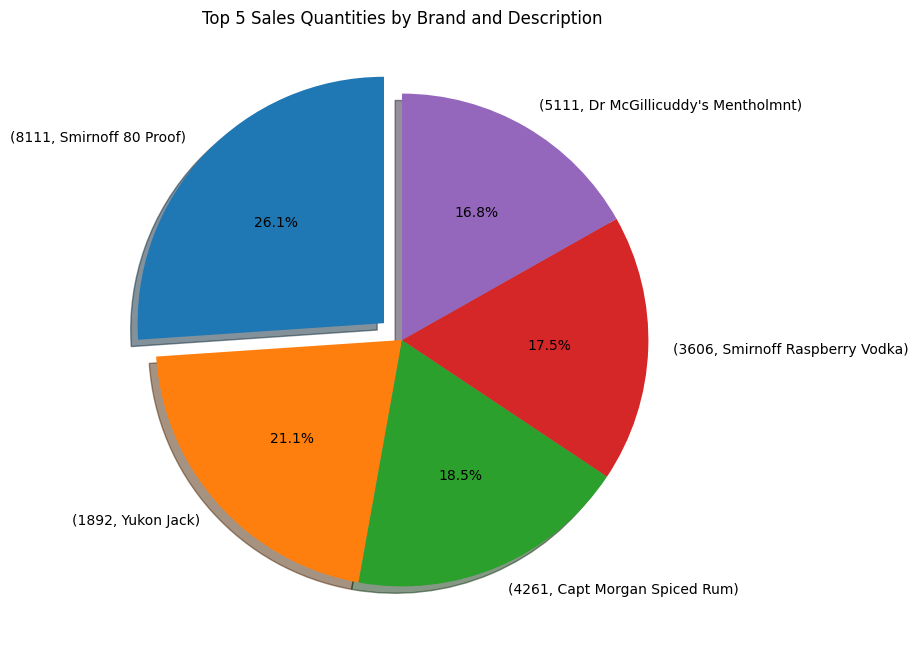

In [49]:
plt.figure(figsize=(8, 8))
top_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0, 0, 0), shadow=True)
plt.title('Top 5 Sales Quantities by Brand and Description')
plt.ylabel('')
plt.show()


**Can you identify the most and least popular products based on sales quantity?**

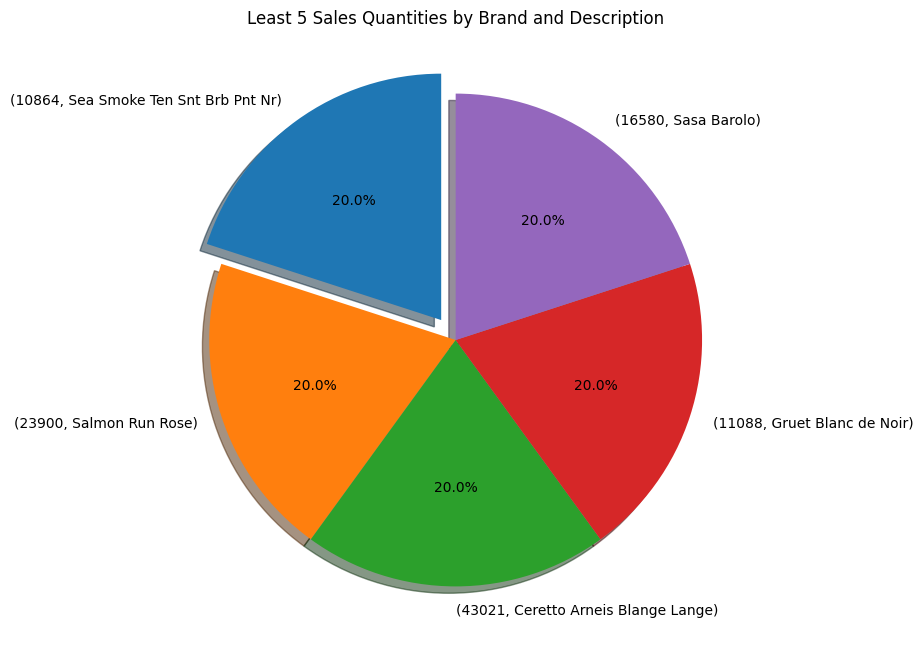

In [50]:
top_sales=df2.groupby(['Brand_x','Description_x'])['SalesQuantity'].sum().sort_values(ascending=False).tail(5)
plt.figure(figsize=(8, 8))
top_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0, 0, 0), shadow=True)
plt.title('Least 5 Sales Quantities by Brand and Description')
plt.ylabel('')
plt.show()

In [51]:
Invoice['PayDate']=pd.to_datetime(Invoice['PayDate'], errors='coerce')
gd=Invoice.groupby(Invoice['PayDate'].dt.strftime('%b')).agg({'Quantity':'max',
                                'Dollars':'max'}).reset_index()

In [52]:
purchase_final['PODate']=pd.to_datetime(purchase_final['PODate'],errors='coerce')


**What is the distribution of sales and purchases over different dates?**

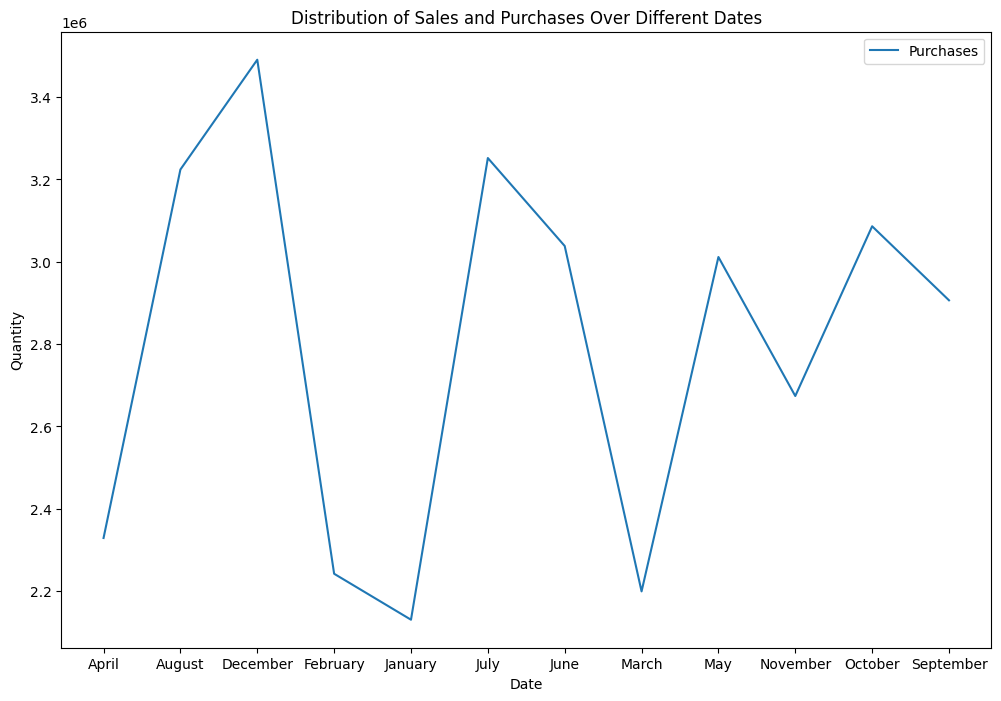

In [53]:
purchase_final['Month'] = purchase_final['PODate'].dt.strftime('%B')
daily_purch = purchase_final.groupby('Month')['Quantity'].sum().reset_index()


plt.figure(figsize=(12, 8))

# Line plot for purchases
sns.lineplot(x='Month', y='Quantity', data=daily_purch, label='Purchases')

# Format x-axis to include full month names
plt.title('Distribution of Sales and Purchases Over Different Dates')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

**How many invoices are there in the "Invoice" dataset?**


In [62]:
invoice=Invoice.shape[0]
print('total number of invoices are ',invoice)

total number of invoices are  5543


**What is the average quantity and dollars per invoice?**

In [72]:
Avg=Invoice.groupby('InvoiceDate').agg({'Quantity':'mean',
                                   'Dollars':'mean'}).reset_index()

In [70]:
Avg=Avg.rename(columns={'Quantity':'Avg_Quantity',
                     'Dollars':'Avg_Dollars'})

In [73]:
Avg

,InvoiceDate,Quantity,Dollars
0,2016-01-04,486.500000,3259.600000
1,2016-01-05,3471.125000,38615.058750
2,2016-01-06,1283.500000,13763.620625
3,2016-01-07,1173.428571,10969.888571
4,2016-01-08,507.176471,6605.008824
...,...,...,...
368,2017-01-06,8350.937500,65175.619375
369,2017-01-07,3499.555556,35727.036667
370,2017-01-08,9472.375000,96309.153750
371,2017-01-09,497.818182,4924.671818


In [98]:
purchase.sample(2)

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
4065,4627,Wiggly Bridge Gold Rum,46.99,750mL,750,1,36.43,4425,MARTIGNETTI COMPANIES
10265,21791,Michael David Svgn Bl,9.99,750mL,750,2,6.84,4425,MARTIGNETTI COMPANIES


In [96]:
combined_data = Invoice.merge( purchase, on='VendorNumber', how='inner')
vendor_analysis = combined_data.groupby('VendorName_x')[['Quantity', 'Dollars']].sum()
print("Vendor Analysis:")
print(vendor_analysis)


Vendor Analysis:
                                  Quantity       Dollars
VendorName_x                                            
AAPER ALCOHOL & CHEMICAL CO              1  1.050700e+02
ADAMBA IMPORTS INTL INC              14196  2.303108e+05
ALISA CARR BEVERAGES                 14016  1.118454e+06
ALTAMAR BRANDS LLC                     996  3.511860e+04
AMERICAN SPIRITS EXCHANGE              396  3.615480e+03
...                                    ...           ...
WEIN BAUER INC                       18084  2.611020e+05
WESTERN SPIRITS BEVERAGE CO        1478360  9.392479e+06
WILLIAM GRANT & SONS INC          25728225  5.066633e+08
WINE GROUP INC                   191002775  1.130607e+09
ZORVINO VINEYARDS                    63300  5.167363e+05

[128 rows x 2 columns]


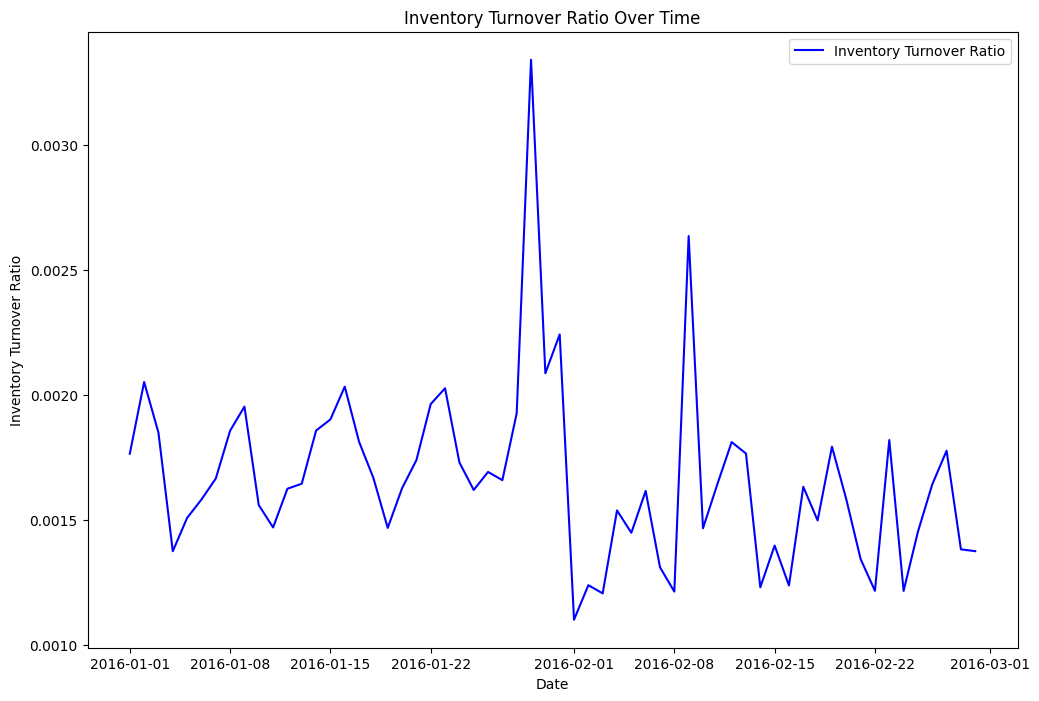

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'inventory' is your DataFrame
# Convert date column to datetime format
df1['SalesDate'] = pd.to_datetime(df1['SalesDate'])

# Calculate inventory turnover ratio
df1['InventoryTurnoverRatio'] = df1['SalesQuantity'] / df1['Quantity']

# Group by date and calculate the average turnover ratio
daily_turnover = df1.groupby('SalesDate')['InventoryTurnoverRatio'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Line plot for inventory turnover ratio
sns.lineplot(x='SalesDate', y='InventoryTurnoverRatio', data=daily_turnover, label='Inventory Turnover Ratio', color='blue')

plt.title('Inventory Turnover Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('Inventory Turnover Ratio')
plt.legend()
plt.show()


# Project Conclusion:

**"After conducting a comprehensive analysis of our inventory data, several key insights have emerged. The Inventory Turnover Ratio, represented in the graph above, illustrates the efficiency of our inventory management system over time. A higher turnover ratio indicates that our products are selling quickly, optimizing cash flow and minimizing holding costs.**

**The trend in the inventory turnover ratio provides valuable insights into the effectiveness of our sales and supply chain strategies. Periods of higher turnover may coincide with successful marketing campaigns or increased customer demand, while lower turnover periods may suggest potential areas for improvement in stock levels or product promotion.**

**Additionally, our analysis has identified top-selling products, popular brands, and patterns in sales quantities. This information can guide future procurement decisions, ensuring that we maintain optimal stock levels for high-demand items.**

**In conclusion, the inventory analysis project has equipped us with actionable insights to enhance our inventory management strategies. By leveraging the power of data-driven decision-making, we are well-positioned to optimize inventory turnover, meet customer demands efficiently, and ultimately contribute to the overall success of our business.**